In [1]:
#Libraries
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('/Users/harikrishnans/Downloads/Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# removing dummy variable
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'].astype(str))
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [5]:
x=df.iloc[:,:4]

In [6]:
wcss=[]
for i in range(1,15):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=1)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

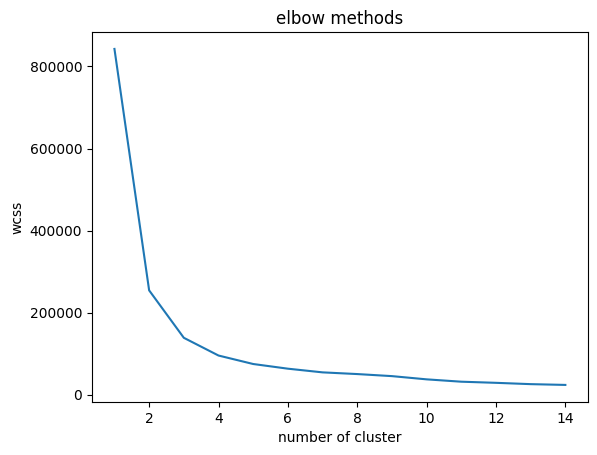

In [7]:
# ploting graph
plt.plot(range(1,15),wcss)
plt.title('elbow methods')
plt.xlabel('number of cluster')
plt.ylabel('wcss')
plt.show()

In [8]:
# clustering
kmeans=KMeans(n_clusters=4,init='k-means++',random_state=1)
y=kmeans.fit_predict(x)

# changing array to column
s=pd.Series(y)
s

0      2
1      2
2      2
3      2
4      2
      ..
195    1
196    1
197    1
198    1
199    1
Length: 200, dtype: int32

In [9]:
# adding new column to dataset
df['clust']=s
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),clust
0,1,1,19,15,39,2
1,2,1,21,15,81,2
2,3,0,20,16,6,2
3,4,0,23,16,77,2
4,5,0,31,17,40,2
...,...,...,...,...,...,...
195,196,0,35,120,79,1
196,197,0,45,126,28,1
197,198,1,32,126,74,1
198,199,1,32,137,18,1


In [10]:
# grouping data based on cluster
df.groupby(df.clust).mean()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
clust,,,,,
0,82.087719,0.508772,46.157895,54.105263,50.017544
1,180.500000,0.475000,37.425000,97.900000,50.975000
2,27.000000,0.358491,35.415094,28.245283,49.811321
3,135.400000,0.420000,35.300000,72.300000,50.200000
